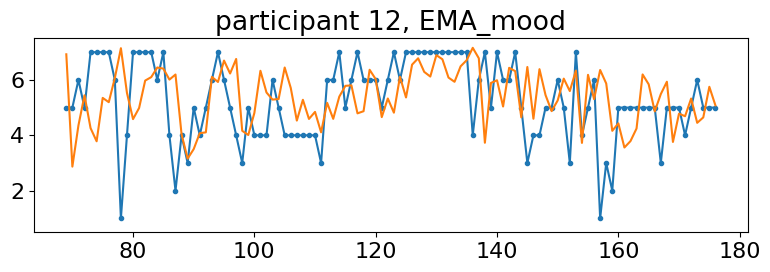

In [1]:
from intervention_effects_utils import EffectsPrediction, ema_names, intervention_names
import utils
import matplotlib.pyplot as plt

raw_data_dir = utils.join_base_path('reallaborai4u/data_management/processed_csv_no_con_no_binning')
model_dir = utils.join_base_path('bptt/results/MRT1_EveryDay02_Smoothed_best_runs')

font_size = 16

E = EffectsPrediction(raw_data_dir, model_dir, model_for_prediction='current', try_to_load_predictions_file=True)

with plt.rc_context({'font.size':font_size}):
    E.plot_simulated_against_data(12, from_first_prediction=True, features=ema_names[0:1], simulated_plot_kwargs={'marker':''})
    plt.tight_layout()

In [3]:
from intervention_effects_utils import EffectsPrediction, ema_names, intervention_names
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm

raw_data_dir = utils.join_base_path('reallaborai4u/data_management/processed_csv_no_con_no_binning')
model_dir = utils.join_base_path('bptt/results/MRT1_EveryDay02_Smoothed_best_runs')

font_size = 16

E = EffectsPrediction(raw_data_dir, model_dir, model_for_prediction='current', try_to_load_predictions_file=True)

with plt.rc_context({'font.size':font_size}):
    for ema in tqdm(ema_names):
        axes = E.plot_simulated_against_data(E.participants, from_first_prediction=True, features=ema,
                                             simulated_plot_kwargs={'marker':''})
        plt.tight_layout()
        plt.savefig(f'plots_for_georgia/{ema}_no_circles.png', dpi=200)
        plt.close()

  0%|          | 0/15 [00:00<?, ?it/s]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


  7%|▋         | 1/15 [00:04<01:02,  4.44s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 13%|█▎        | 2/15 [00:08<00:58,  4.51s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 20%|██        | 3/15 [00:13<00:54,  4.52s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 27%|██▋       | 4/15 [00:18<00:50,  4.57s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 33%|███▎      | 5/15 [00:22<00:46,  4.61s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 40%|████      | 6/15 [00:27<00:41,  4.58s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 47%|████▋     | 7/15 [00:31<00:35,  4.47s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 53%|█████▎    | 8/15 [00:36<00:31,  4.51s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 60%|██████    | 9/15 [00:40<00:27,  4.52s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 67%|██████▋   | 10/15 [00:45<00:22,  4.57s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 73%|███████▎  | 11/15 [00:50<00:18,  4.61s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 80%|████████  | 12/15 [00:54<00:13,  4.61s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 87%|████████▋ | 13/15 [00:59<00:09,  4.50s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


 93%|█████████▎| 14/15 [01:03<00:04,  4.54s/it]

No data to plot from participants [23, 31, 33, 39, 40, 42, 46, 50, 53, 56, 111, 112, 120, 125, 126].


100%|██████████| 15/15 [01:08<00:00,  4.55s/it]


/tmp/ipykernel_3114043/2242471046.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MAE = pred_effects.groupby(['participant','model_timestep']).mean()


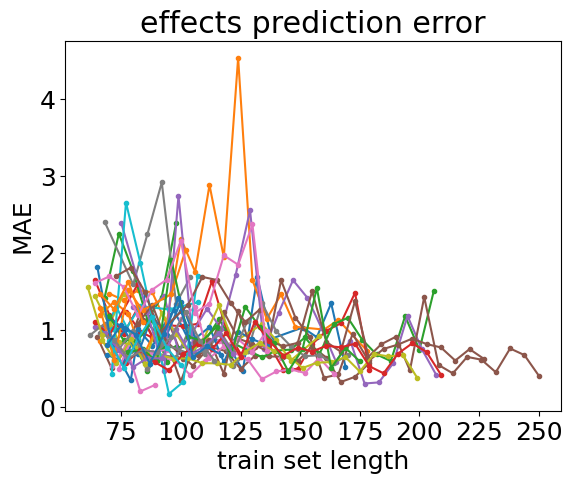

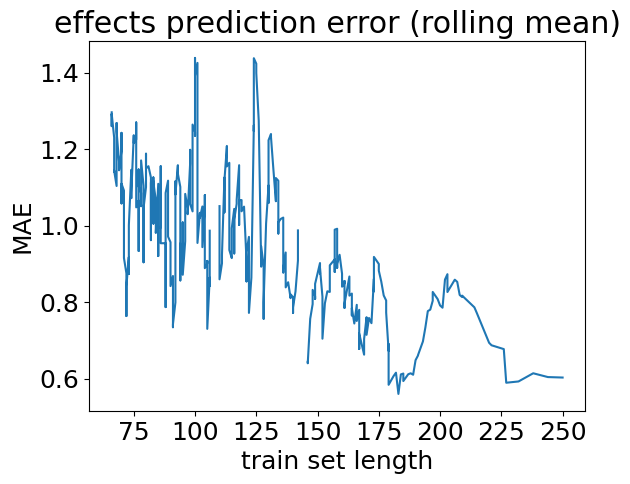

In [33]:
import matplotlib.pyplot as plt

font_size = 18

EMI_only = True
gt_effects = E.calc_effects(use_predicted=False, EMI_only=EMI_only)
pred_effects = E.calc_effects(use_predicted=True, EMI_only=EMI_only)

pred_effects['MAE'] = (pred_effects - gt_effects).abs().mean(axis=1)
pred_effects = pred_effects[pred_effects['model_id'].notna()]
MAE = pred_effects.groupby(['participant','model_timestep']).mean()

with plt.rc_context({'font.size':font_size}):
    plt.figure()
    for p in MAE.index.get_level_values('participant').unique():
        MAE.loc[p, 'MAE'].plot(marker='.', title='effects prediction error', xlabel='train set length', ylabel='MAE')

    plt.figure()
    MAE['MAE'].sort_index(level='model_timestep').rolling(10).mean().droplevel('participant').plot(
        title='effects prediction error (rolling mean)', xlabel='train set length', ylabel='MAE'
    )

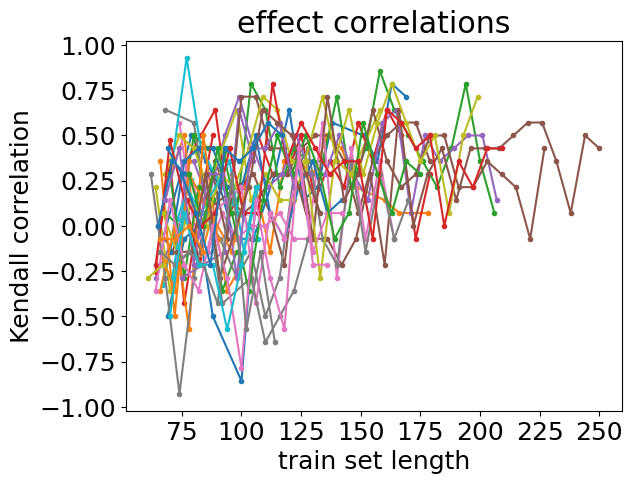

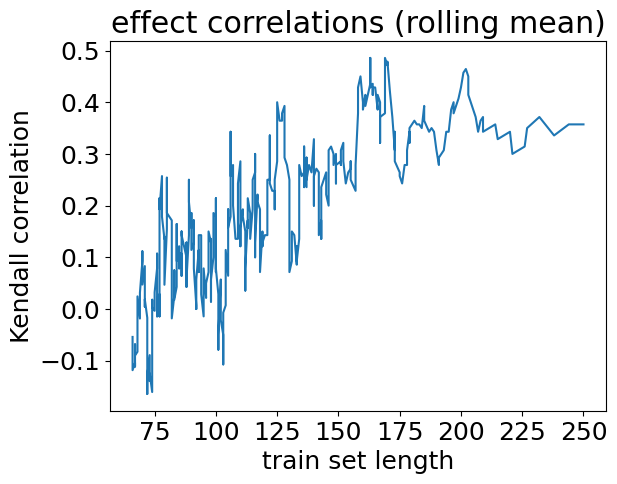

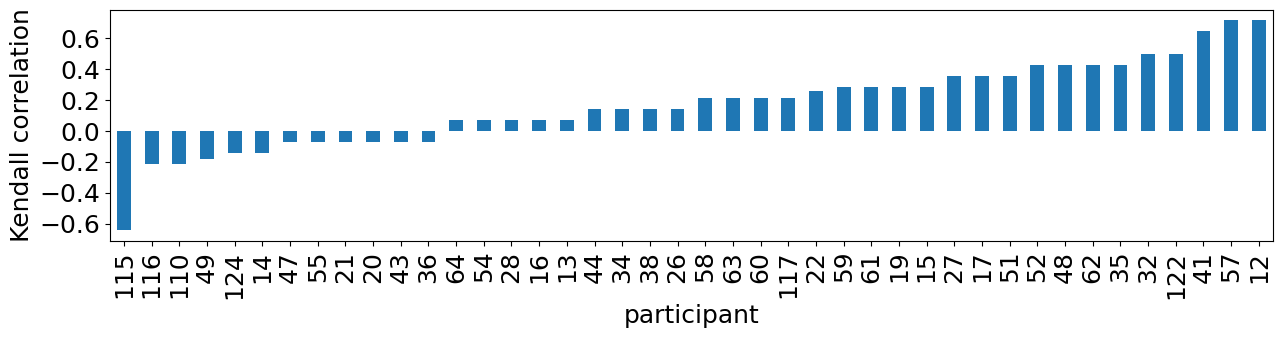

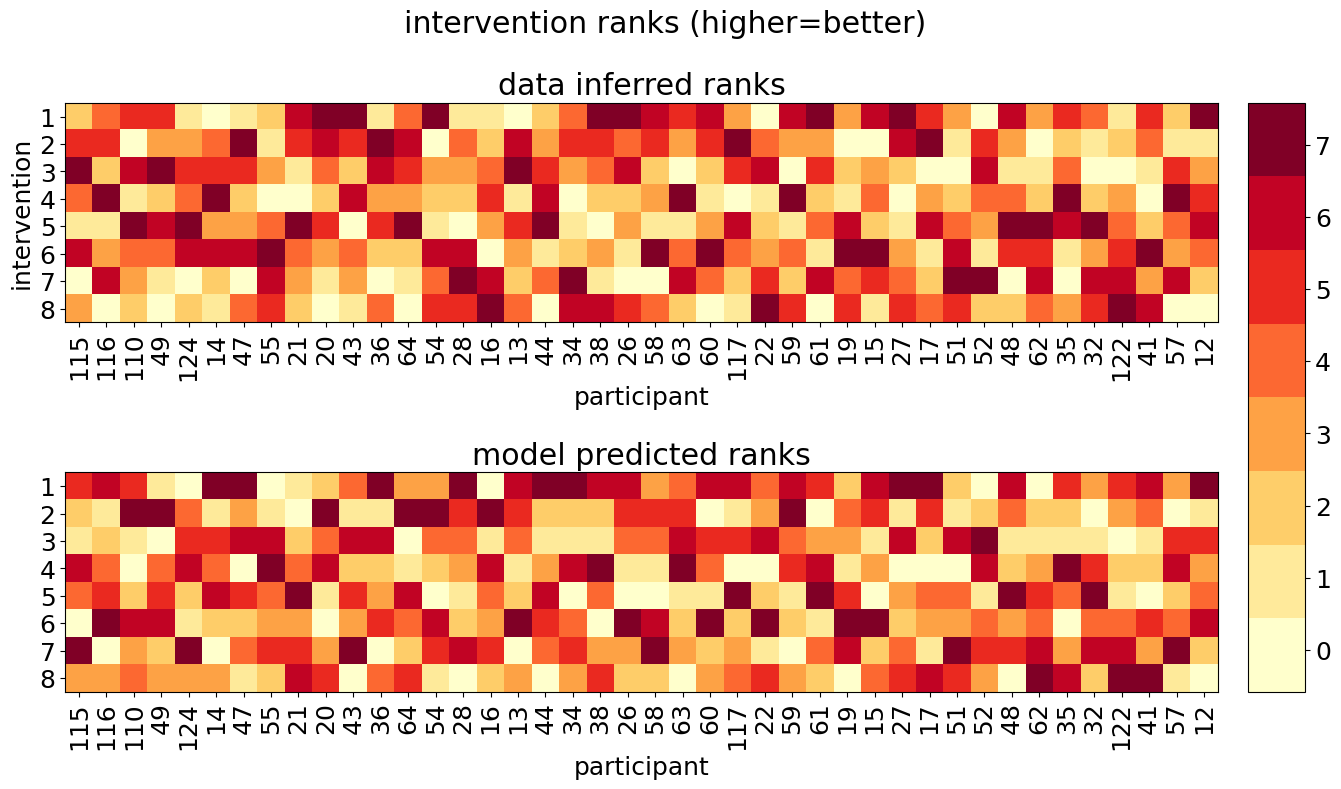

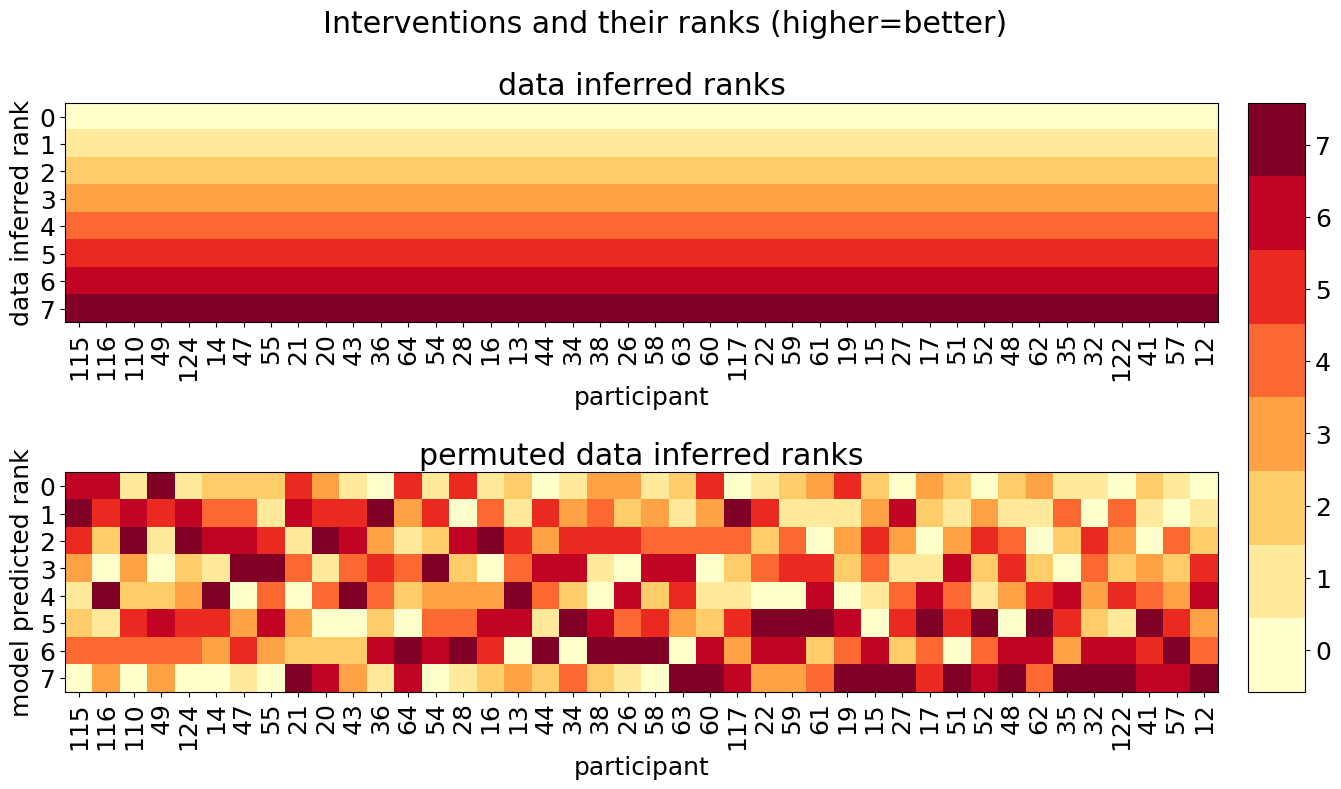

In [37]:
import sys
sys.path.append('..')
import eval_reallabor_utils
import pandas as pd
import torch as tc
import numpy as np
from tqdm import tqdm
from plotting_utils import discretized_colormap, subplots_with_colorbar
import matplotlib.pyplot as plt
import matplotlib as mpl

# predicted_score = pd.DataFrame(index=MAE.index, columns=intervention_names, data=0.)
# gt_score = pd.DataFrame(index=MAE.index, columns=intervention_names)

# for (participant, timestep), group in tqdm(pred_effects.groupby(['participant','model_timestep'])):
#     model_dir = group['model_id'].unique().item()
#     model, _ = eval_reallabor_utils.load_model_and_data(model_dir)
#     n_ints = len(intervention_names)
#     rest_inputs = model.args['dim_s'] - n_ints
#     interventions_matrix = tc.hstack((tc.eye(n_ints), tc.zeros((n_ints, rest_inputs)))) 
#     score = tc.zeros(n_ints)
#     for i in range(100):
#         emas = tc.randint(1, 8, (1, model.args['dim_x']))
#         for i, inter in enumerate(interventions_matrix):
#             current_inputs = inter.unsqueeze(0)        
#             predicted_traj, _ = model.generate_free_trajectory(emas, current_inputs, 2) 
#             effect = (predicted_traj[1] - emas).mean()
#             if not tc.isnan(effect):
#                 predicted_score.loc[(participant, timestep), intervention_names[i]] += effect.item()
#     gt_score.loc[(participant, timestep)] = E.aggregate_effects(participant)

# predicted_score /= 800

# predicted_score.to_csv('predictions/predicted_score.csv')
# gt_score.to_csv('predictions/gt_score.csv')


predicted_score = pd.read_csv('predictions/predicted_score.csv', index_col=[0,1])
gt_score = pd.read_csv('predictions/gt_score.csv', index_col=[0,1])

correlations = predicted_score.corrwith(gt_score, axis=1, method='kendall')

font_size = 18

with plt.rc_context():
    mpl.rcParams['font.size'] = font_size
    plt.figure()
    for p in correlations.index.get_level_values('participant').unique():
        correlations.loc[p].plot(marker='.', title='effect correlations', xlabel='train set length', ylabel='Kendall correlation')

    plt.figure()
    correlations.sort_index(level='model_timestep').rolling(10).mean().droplevel('participant').plot(
        title='effect correlations (rolling mean)', xlabel='train set length', ylabel='Kendall correlation'
    )


participants = correlations.groupby('participant').last().sort_values().index

with plt.rc_context():
    mpl.rcParams['font.size'] = font_size
    plt.figure(figsize=(15,3))
    correlations.groupby('participant').last().loc[participants].plot(kind='bar', xlabel='participant', ylabel='Kendall correlation',
                                                                      rot=90)


L = len(intervention_names)
# participants = correlations.index.get_level_values('participant').unique()
cmap = discretized_colormap('YlOrRd', L)
data_ranks = gt_score.groupby('participant').last().apply(lambda x: np.argsort(np.argsort(x)), axis=1)
model_ranks = predicted_score.groupby('participant').last().apply(lambda x: np.argsort(np.argsort(x)), axis=1)

with plt.rc_context({'font.size':font_size}):
    fig, axes = subplots_with_colorbar(data_ranks.loc[participants].T, model_ranks.loc[participants].T, 
                                    nrows=2, share_all=True, cmap=cmap, aspect='auto', axes_pad=1.5, cbar_size='2.5%',
                                    figsize=(16,8), cbar_ticks=np.linspace(0.5, L-1.5, L), cbar_ticklabels=range(L))
    axes[0].set_ylabel('intervention')
    axes[0].set_yticks(range(L), labels=np.arange(L)+1)
    axes[0].set_xlabel('participant')
    axes[0].set_xticks(range(len(model_ranks.index)), labels=participants, rotation=90)
    axes[0].set_title('data inferred ranks')
    axes[1].set_xlabel('participant')
    axes[1].set_xticks(range(len(model_ranks.index)), labels=participants, rotation=90)
    axes[1].set_title('model predicted ranks')
    fig.suptitle('intervention ranks (higher=better)')


    reordered_ranks = np.zeros((len(participants), L))
    for j, p in enumerate(participants):
        reordered_ranks[j] = data_ranks.loc[p].loc[model_ranks.loc[p].sort_values().index].to_numpy()

    fig, ax = subplots_with_colorbar(tc.arange(len(intervention_names)).repeat((len(model_ranks.index), 1)).T, reordered_ranks.T,
                                    nrows=2, share_all=True, cmap=cmap, aspect='auto', axes_pad=1.5, cbar_size='2.5%',
                                    figsize=(16,8), cbar_ticks=np.linspace(0.5, L-1.5, L), cbar_ticklabels=range(L))

    ax[0].set_xlabel('participant')
    ax[0].set_ylabel('data inferred rank')
    ax[0].set_xticks(range(len(participants)), labels=participants, rotation=90)
    ax[0].set_yticks(range(L), labels=np.arange(L))
    ax[0].set_title('data inferred ranks')
    # for pi, p in enumerate(participants):
    #     ordered_intervs = data_ranks.loc[p].argsort().to_numpy() + 1
    #     for ii, i in enumerate(intervention_names):
    #         ax[0].annotate(str(ordered_intervs[ii]), (pi,ii))

    ax[1].set_xlabel('participant')
    ax[1].set_ylabel('model predicted rank')
    ax[1].set_xticks(range(len(participants)), labels=participants, rotation=90)
    ax[1].set_yticks(range(L), labels=np.arange(L))
    ax[1].set_title('permuted data inferred ranks')
    # for pi, p in enumerate(participants):
    #     ordered_intervs = model_ranks.loc[p].argsort().to_numpy() + 1
    #     for ii, i in enumerate(intervention_names):
    #         ax[1].annotate(str(ordered_intervs[ii]), (pi,ii))

    fig.suptitle('Interventions and their ranks (higher=better)')
